# 0 Data Load and Prep

Importing and preparing the data for analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
files.upload()

{}

In [4]:
df = pd.read_csv("ratings.csv")

In [5]:
df.to_csv("ratings.csv", index=False)

In [6]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
df2 = pd.read_csv("movies.csv")

In [8]:
df2.to_csv("movies.csv", index=False)

In [9]:
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Data integrity and formatting

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
df["enjoyed"] = np.where(df["rating"] > 2.5, 1, 0)

In [12]:
# split genre column
df2[['Genre1', 'Genre2', 'Genre3']] = df2['genres'].str.split('|', n=2, expand=True)
df2 = df2.drop(['genres', 'Genre3'], axis=1)
print(df2[['Genre1', 'Genre2']])

         Genre1     Genre2
0     Adventure  Animation
1     Adventure   Children
2        Comedy    Romance
3        Comedy      Drama
4        Comedy       None
...         ...        ...
9737     Action  Animation
9738  Animation     Comedy
9739      Drama       None
9740     Action  Animation
9741     Comedy       None

[9742 rows x 2 columns]


In [13]:
df2.isnull().sum()

movieId       0
title         0
Genre1        0
Genre2     2851
dtype: int64

In [14]:

#rename int columns in standard way

names_update = []

for col_names in df2.columns:

    if type(col_names) == int:
        name = f"genre_{col_names}"
        names_update.append(name)

    else:
        name = col_names
        names_update.append(name)

df2.columns = names_update
df2.head()

,movieId,title,Genre1,Genre2
0,1,Toy Story (1995),Adventure,Animation
1,2,Jumanji (1995),Adventure,Children
2,3,Grumpier Old Men (1995),Comedy,Romance
3,4,Waiting to Exhale (1995),Comedy,Drama
4,5,Father of the Bride Part II (1995),Comedy,None


In [15]:
df = df.merge(df2, how = "inner", on = "movieId")

In [16]:
df.head()

,userId,movieId,rating,timestamp,enjoyed,title,Genre1,Genre2
0,1,1,4.0,964982703,1,Toy Story (1995),Adventure,Animation
1,5,1,4.0,847434962,1,Toy Story (1995),Adventure,Animation
2,7,1,4.5,1106635946,1,Toy Story (1995),Adventure,Animation
3,15,1,2.5,1510577970,0,Toy Story (1995),Adventure,Animation
4,17,1,4.5,1305696483,1,Toy Story (1995),Adventure,Animation


In [17]:
#Extracting the year from brackets

df["year"] = df["title"].str.extract(r"\((\d{4})\)")
df["title"] = df["title"].str.replace(r"\s*\(\d{4}\)", "")

df["year1"] = pd.to_datetime(df["year"] + "-01-01")

df["year"] = df["year1"]
df = df.drop(["year1"], axis = 1)
df.head()

<ipython-input-17-e576761eb5f6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["title"] = df["title"].str.replace(r"\s*\(\d{4}\)", "")


,userId,movieId,rating,timestamp,enjoyed,title,Genre1,Genre2,year
0,1,1,4.0,964982703,1,Toy Story,Adventure,Animation,1995-01-01
1,5,1,4.0,847434962,1,Toy Story,Adventure,Animation,1995-01-01
2,7,1,4.5,1106635946,1,Toy Story,Adventure,Animation,1995-01-01
3,15,1,2.5,1510577970,0,Toy Story,Adventure,Animation,1995-01-01
4,17,1,4.5,1305696483,1,Toy Story,Adventure,Animation,1995-01-01


In [18]:
df.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
enjoyed          0
title            0
Genre1           0
Genre2       16414
year            18
dtype: int64

# 1 Understanding the Data

Exploratory Data
Movies data set data integrity check and explanatory data analytics.

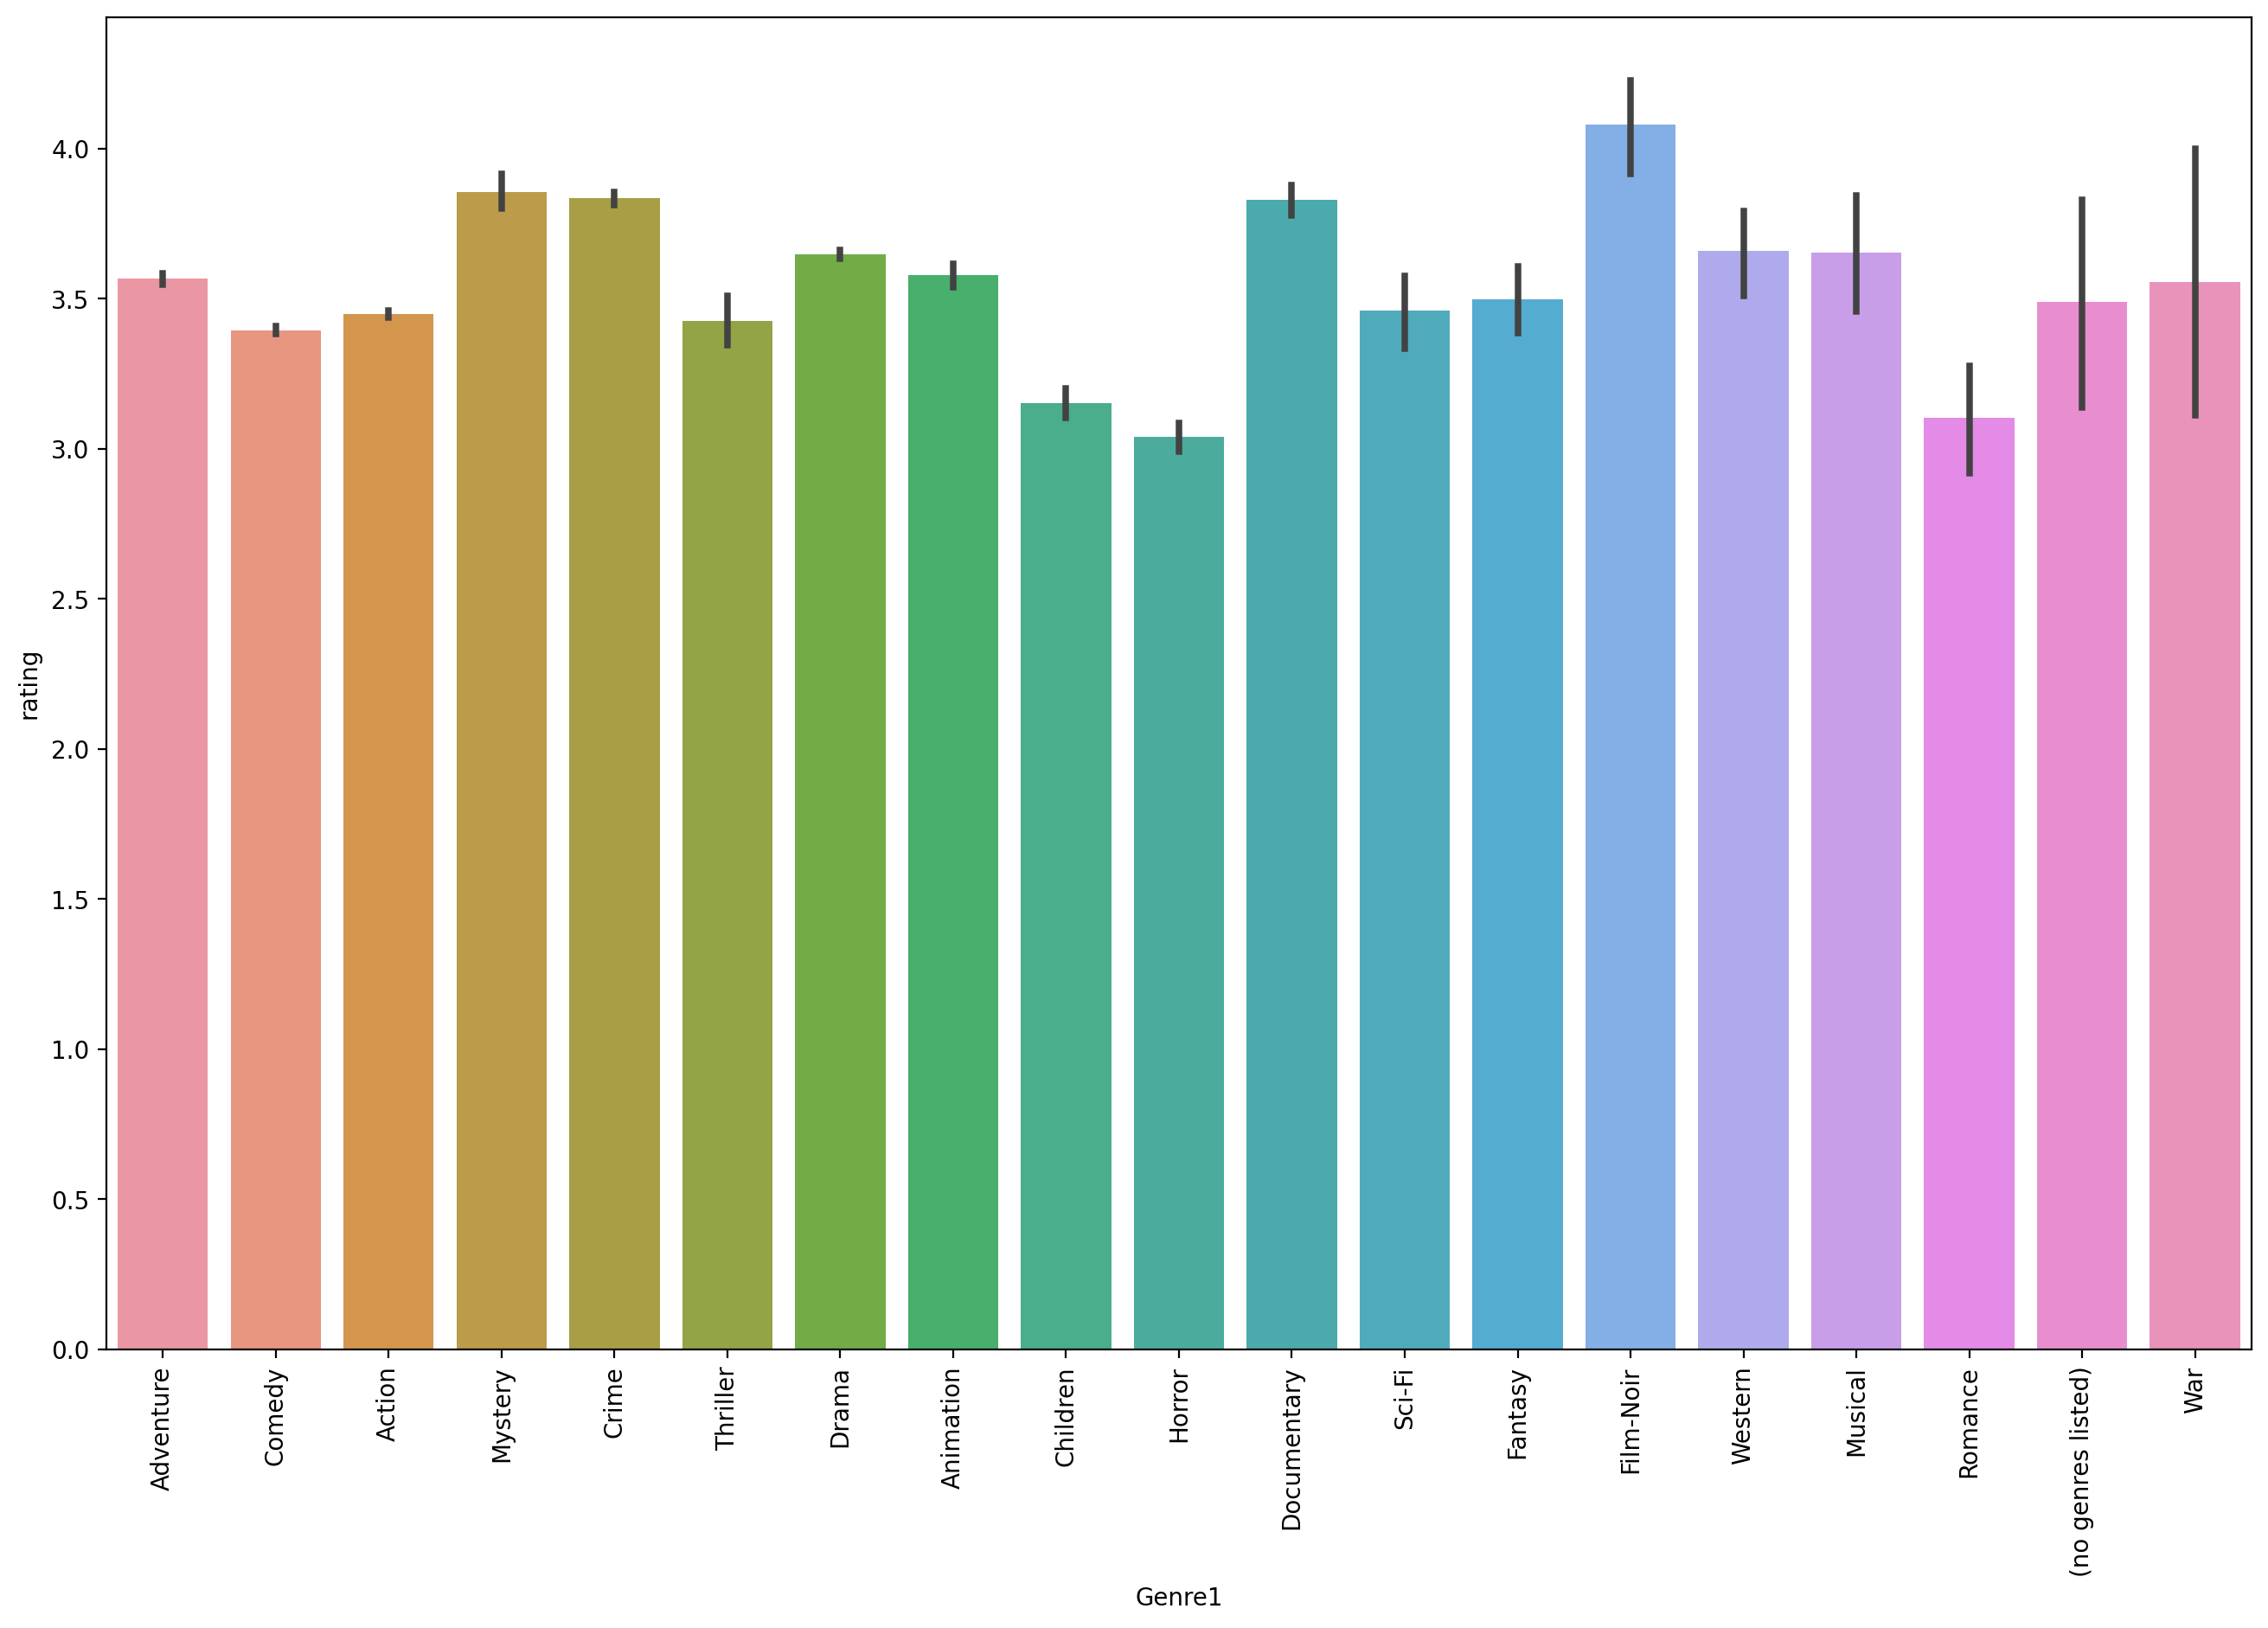

In [19]:
#ratings by genres
fig = plt.figure(figsize = (16, 10), dpi = 200)
sns.barplot(data = df, x = "Genre1", y = "rating")
plt.xticks(rotation = 90);

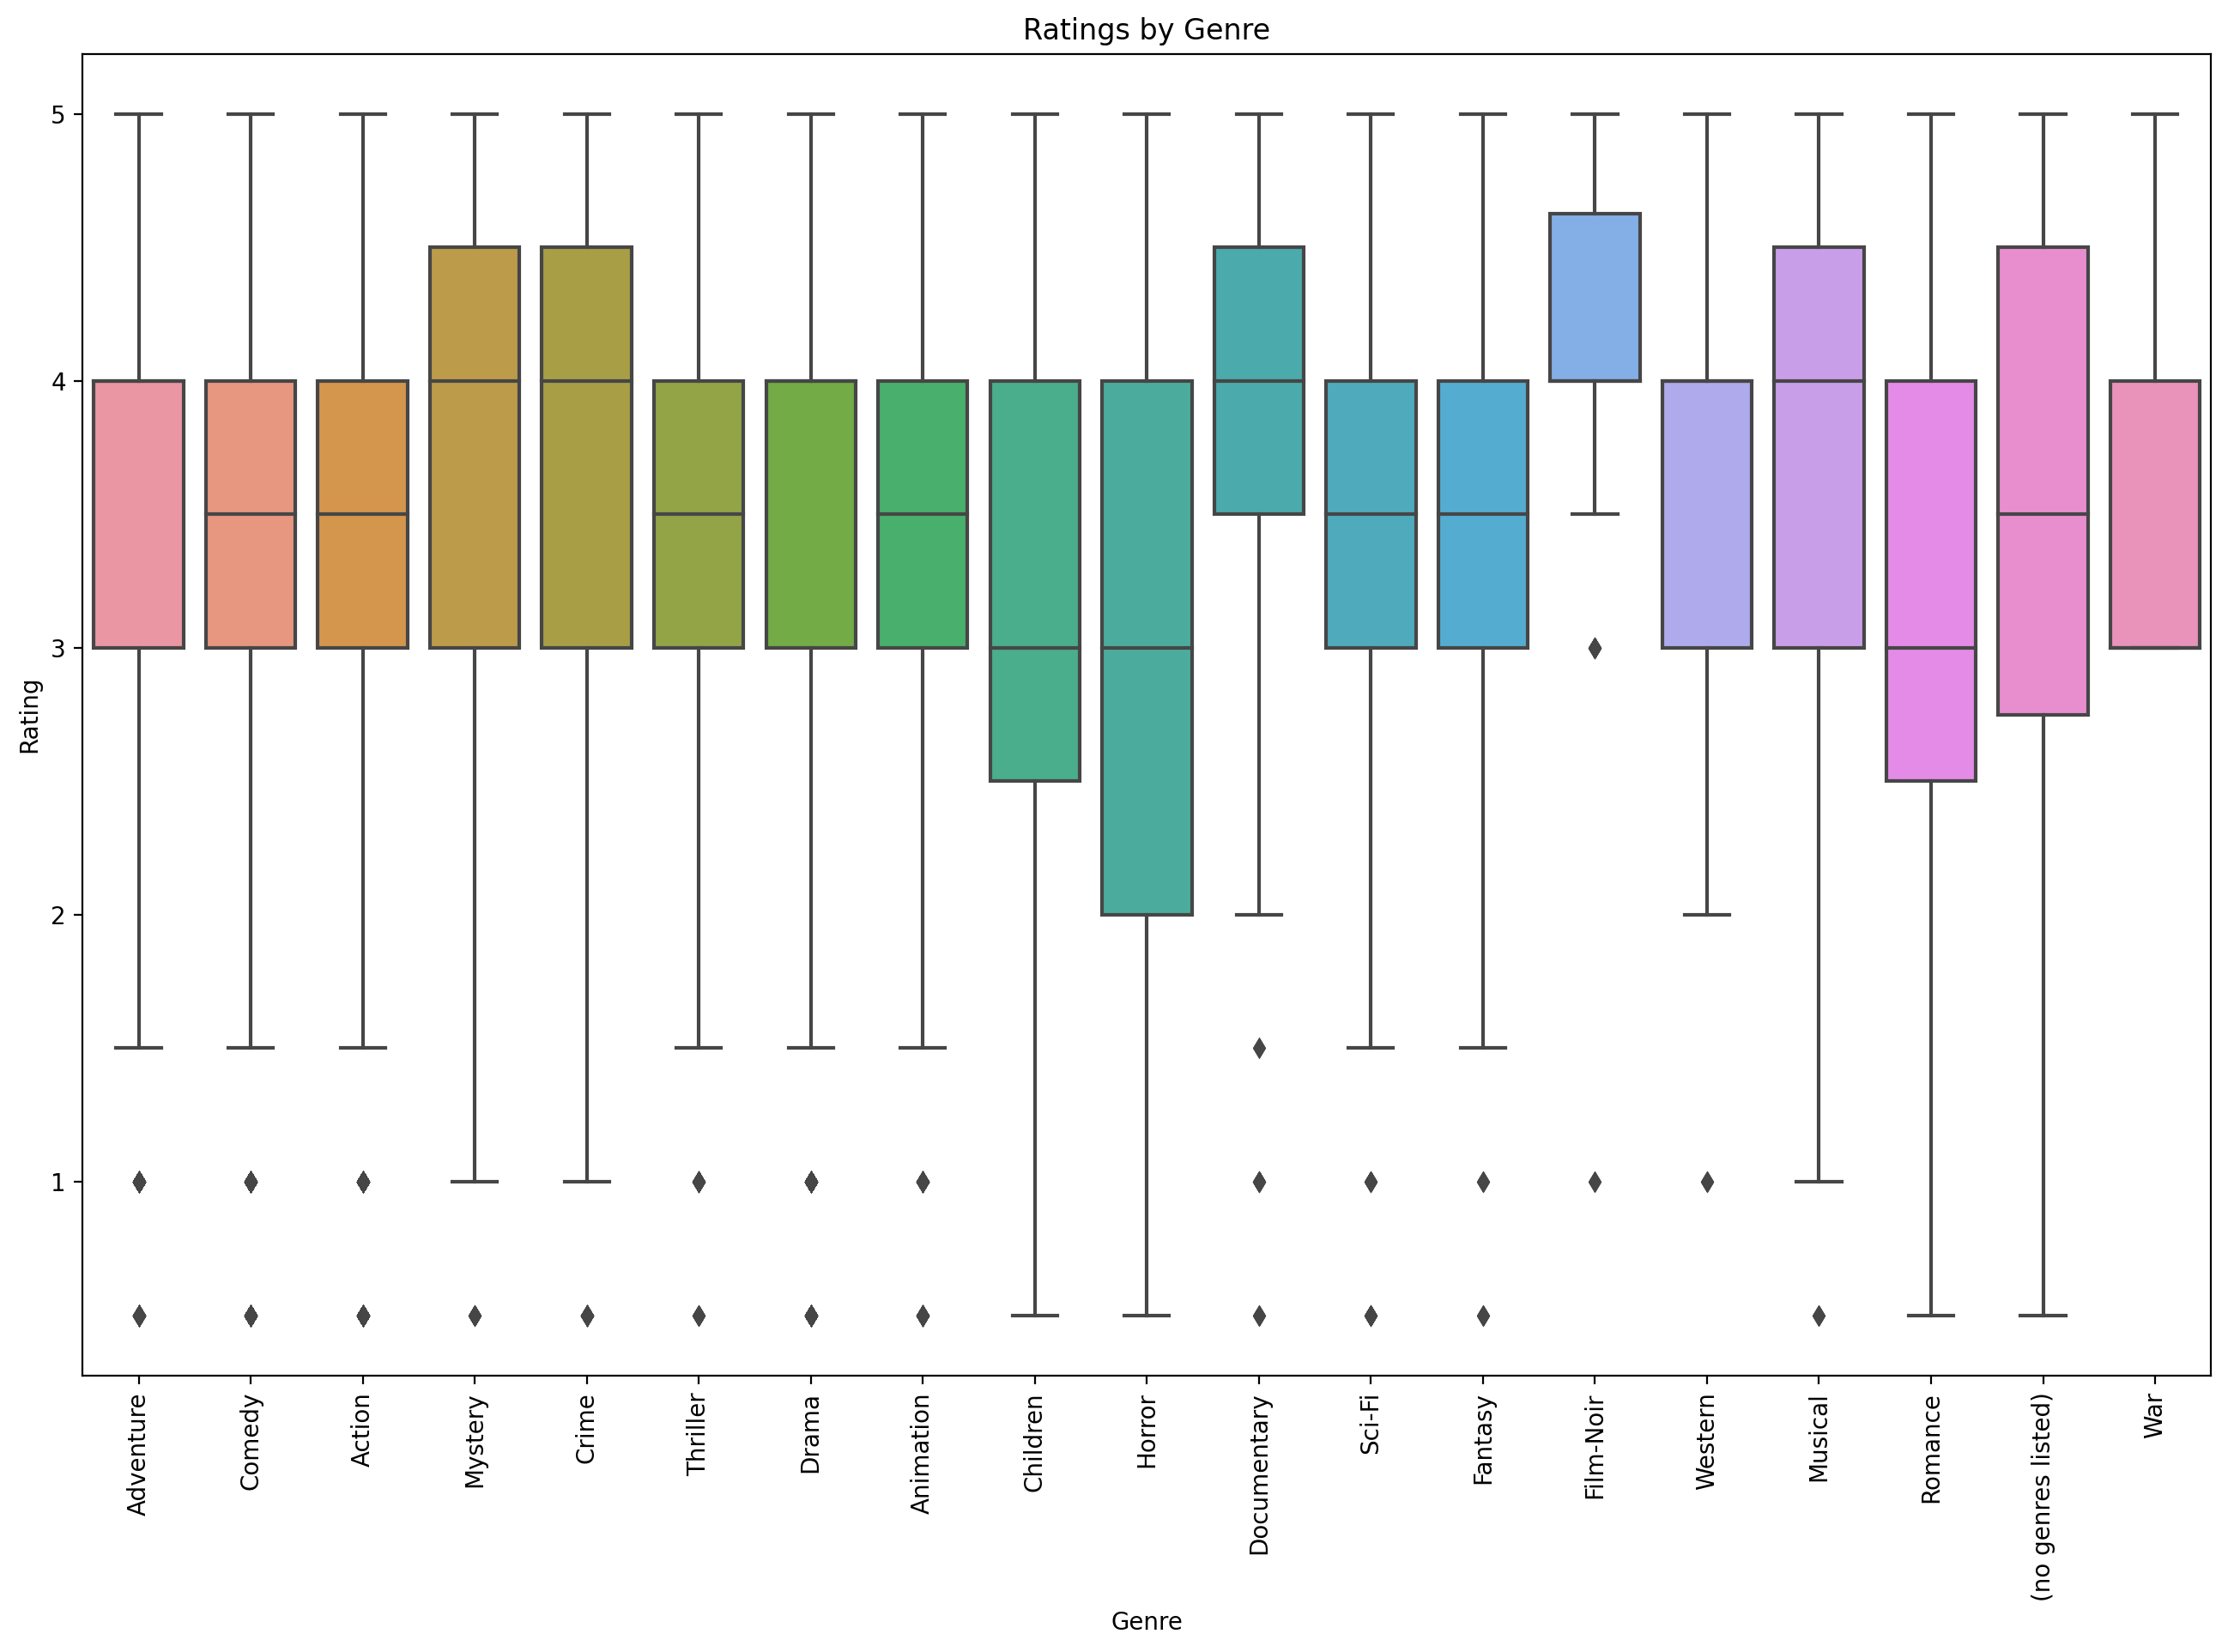

In [20]:
fig = plt.figure(figsize = (16, 10), dpi = 200)
sns.boxplot(data = df, x = "Genre1", y = "rating")
plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Ratings by Genre');

<ipython-input-21-0d2831411f10>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby("year").mean()


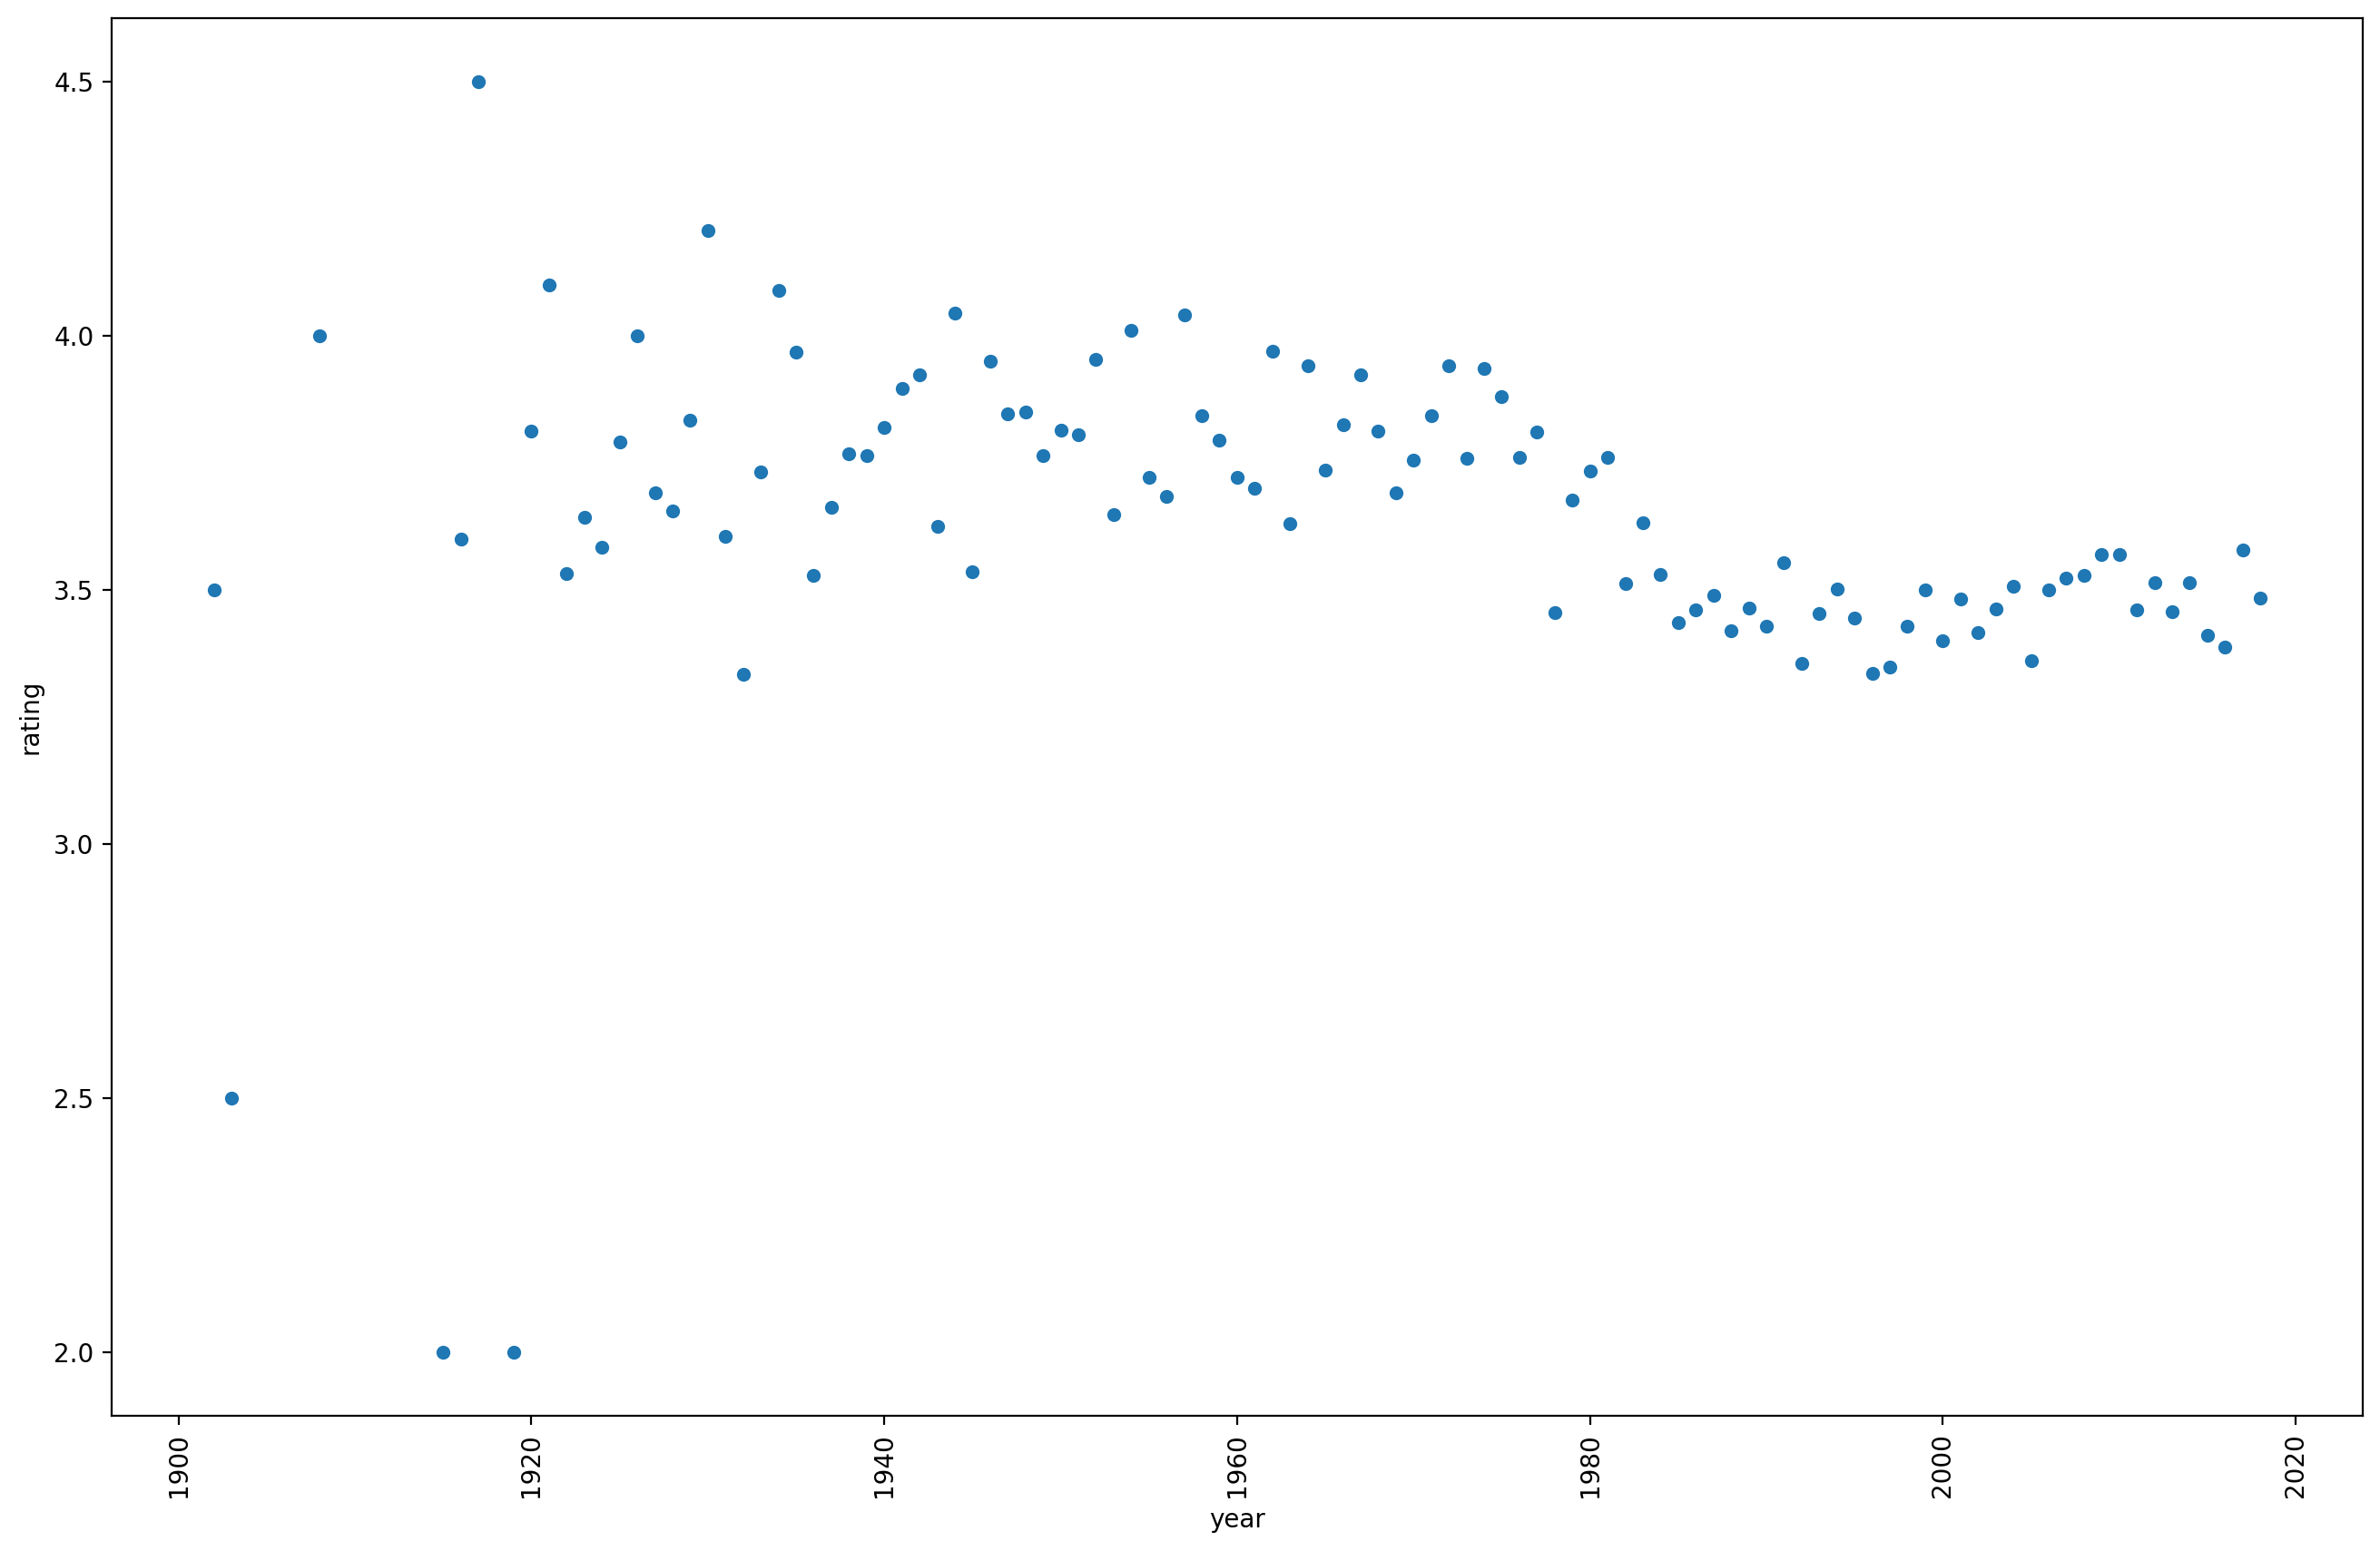

In [21]:

#Yearly analysis
#group by year and check distribution
grouped = df.groupby("year").mean()
fig = plt.figure(figsize=(16, 10), dpi=200)
sns.scatterplot(data = grouped, x = "year", y = "rating")

plt.xticks(rotation=90);

#ax.tick_params(axis='x', labelsize=9, labelcolor='black', pad=8)

Text(0.5, 1.0, 'Movie rating over time')

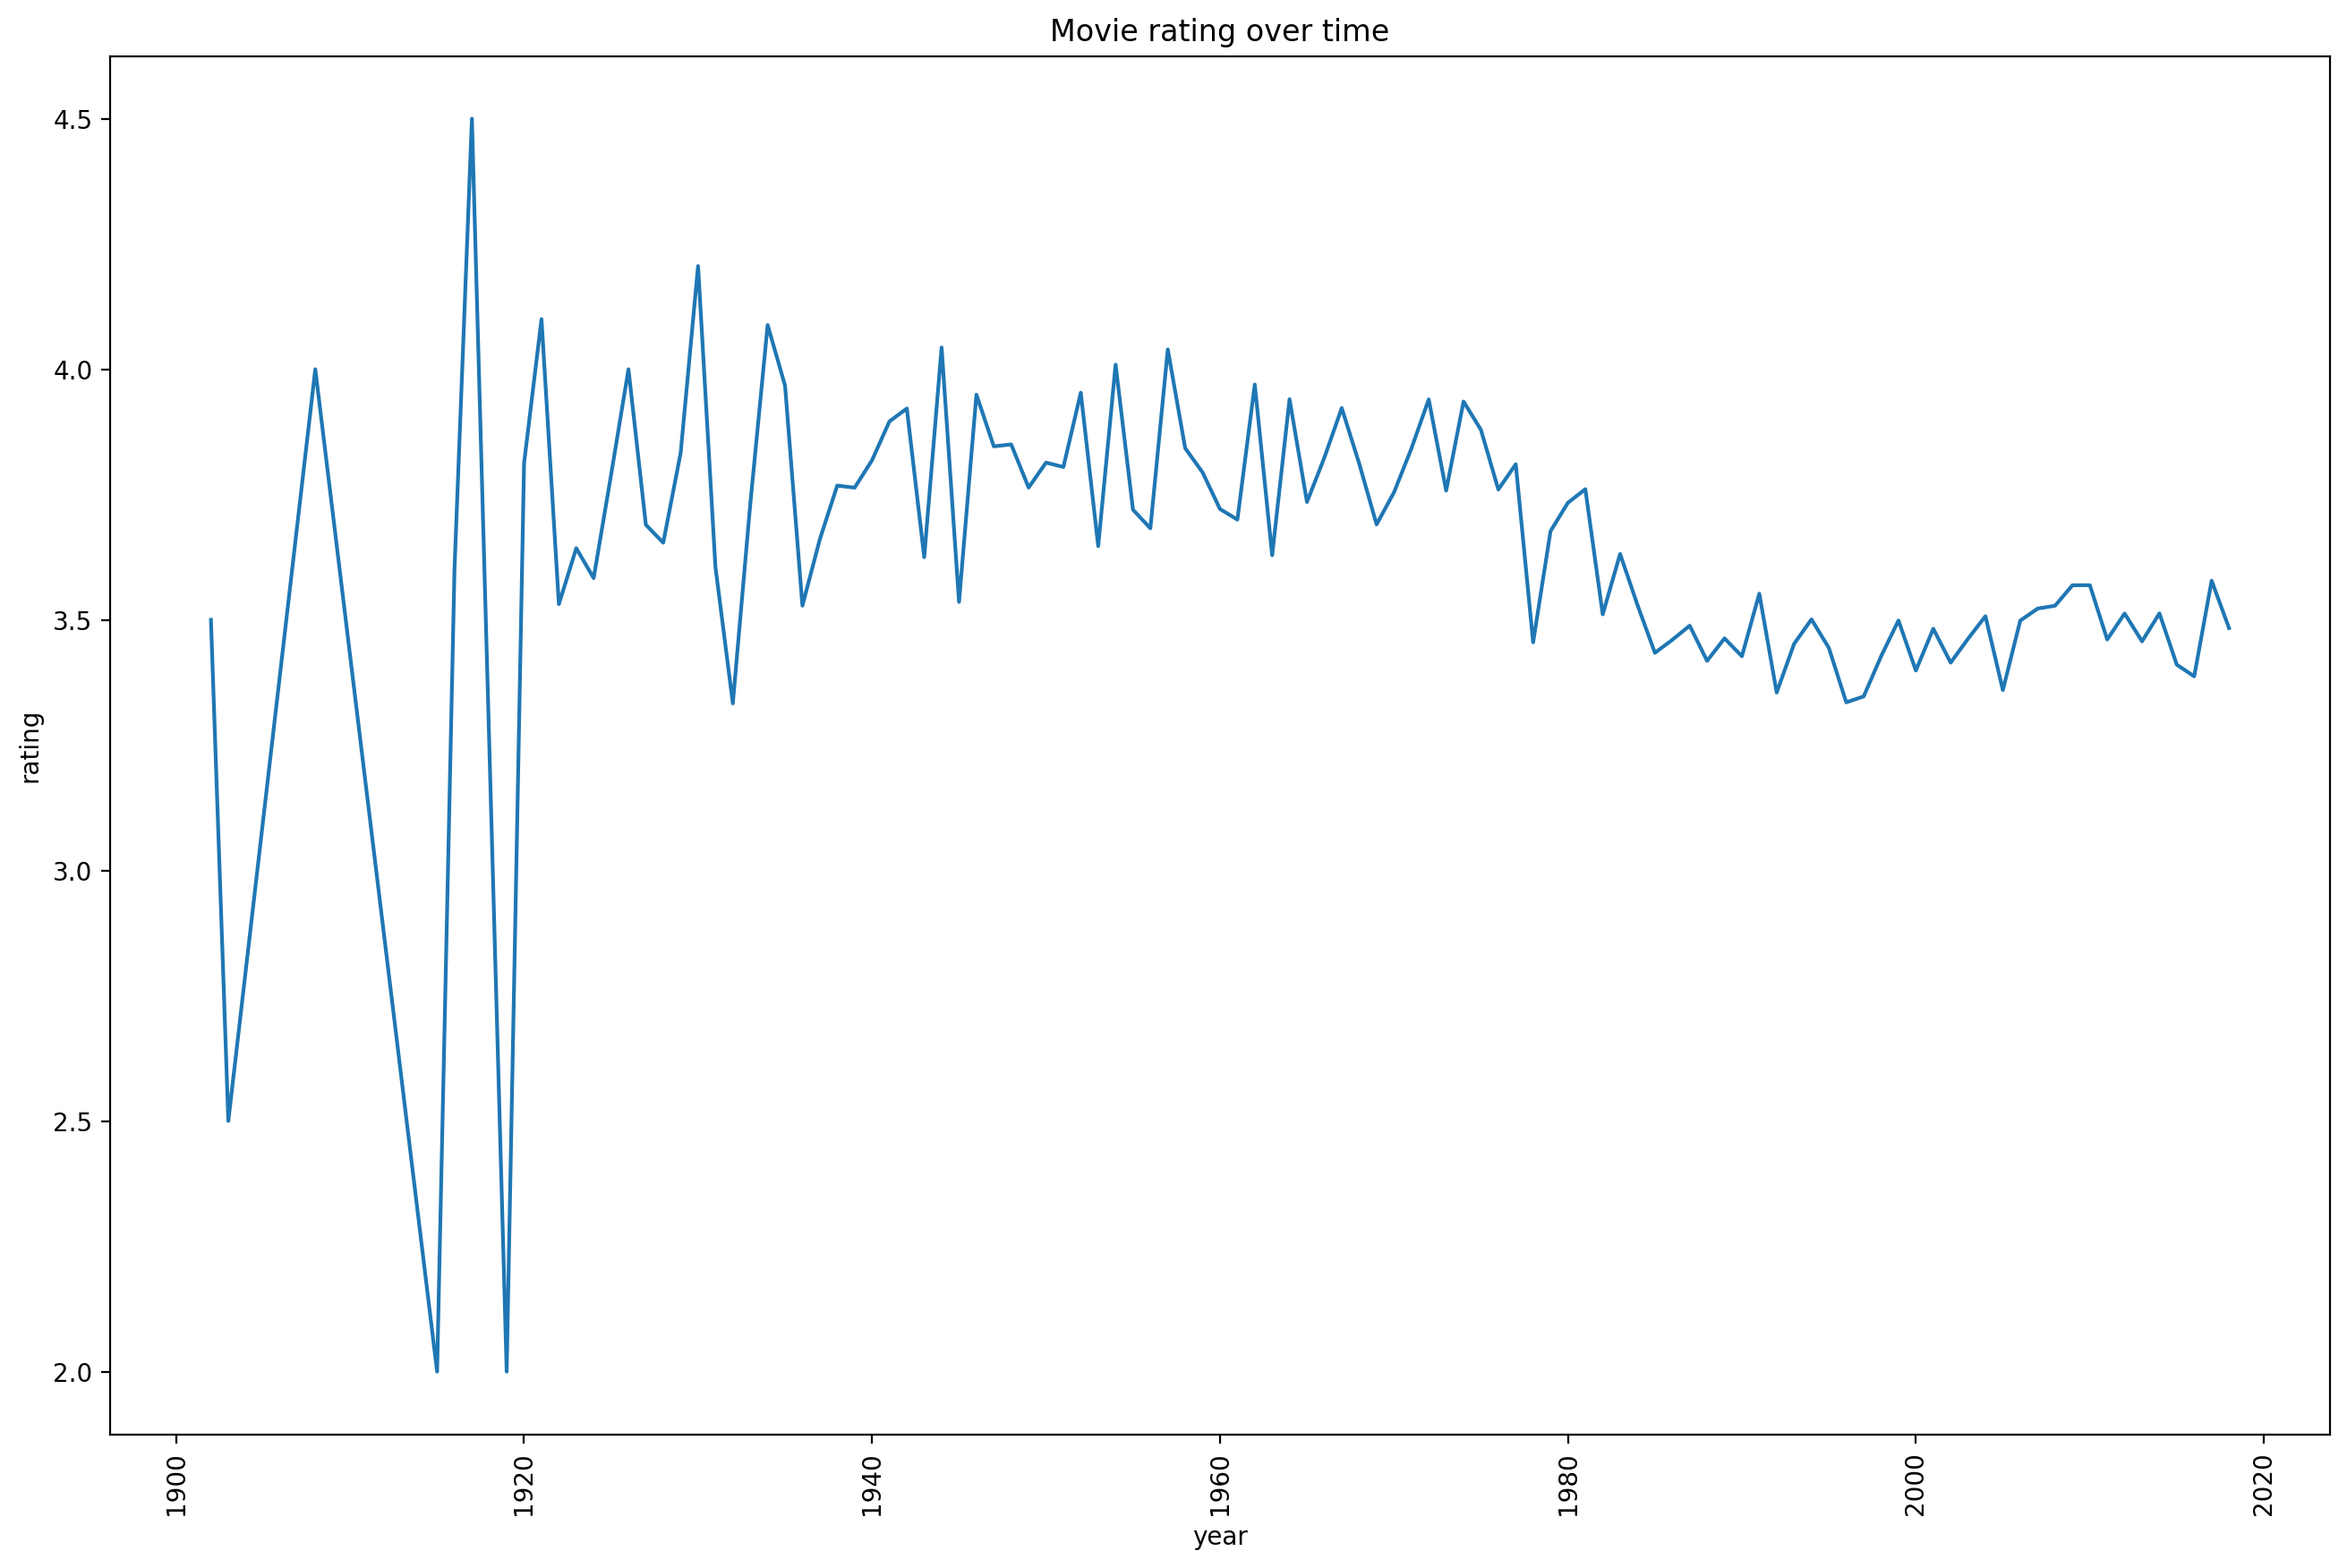

In [22]:

#ratings over time
fig = plt.figure(figsize=(16, 10), dpi=200)
sns.lineplot(data=grouped.sort_values(["year"]), x="year", y="rating")

plt.xticks(rotation=90);
plt.title("Movie rating over time")

#ax.tick_params(axis='x', labelsize=9, labelcolor='black', pad=8)

Text(0.5, 1.0, 'Movieive rating distribution')

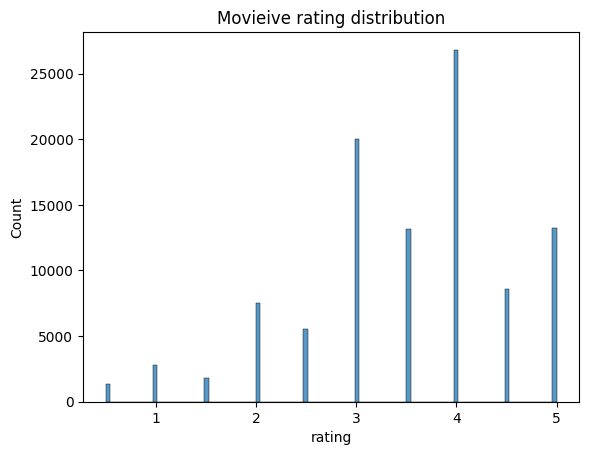

In [23]:

#distrubtion of ratings
sns.histplot(data = df, x = "rating")
plt.title("Movieive rating distribution")

In [24]:
#top ten highest rated movies
grouped = df.groupby("title").mean()
grouped[grouped["rating"] == 5]
grouped[grouped["rating"] == 0.5]

<ipython-input-24-53669c0aa818>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby("title").mean()


,userId,movieId,rating,timestamp,enjoyed
title,,,,,
3 Ninjas Knuckle Up,307.0,4750.0,0.5,1.186259e+09,0.0
3 dev adam (Three Giant Men),599.0,104017.0,0.5,1.519369e+09,0.0
Aloha,298.0,134528.0,0.5,1.458650e+09,0.0
Alone in the Dark,307.0,31424.0,0.5,1.186261e+09,0.0
Amer,204.0,83601.0,0.5,1.327183e+09,0.0
...,...,...,...,...,...
"Wasp Woman, The",448.0,8137.0,0.5,1.221416e+09,0.0
While the City Sleeps,580.0,8236.0,0.5,1.167791e+09,0.0
Wizards of the Lost Kingdom II,448.0,157172.0,0.5,1.492797e+09,0.0


<Axes: xlabel='rating', ylabel='Count'>

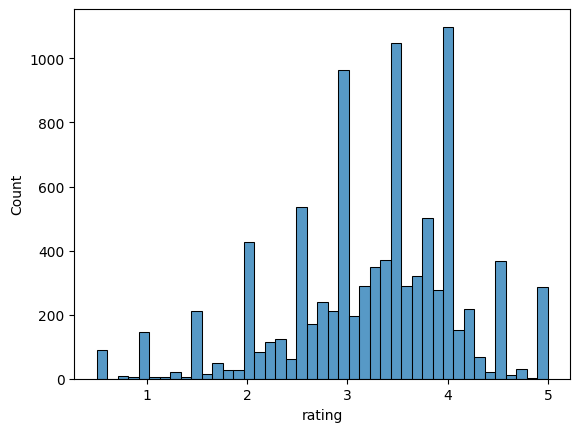

In [25]:
sns.histplot(data = grouped, x = "rating")

# 2 Expand Create Data set for Clustering

Create data frame filled for average ratings to Cluster upon

In [26]:
avg_ratings = df.groupby("userId").mean()["rating"]

<ipython-input-26-7e9535eab7cf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_ratings = df.groupby("userId").mean()["rating"]


In [27]:
new_df = pd.pivot_table(data = df, values = "rating", columns = "title", index = "userId", aggfunc = np.mean)

In [28]:
for i in range(1,len(new_df)+1):
   new_df[i-1: i] = new_df[i-1: i].fillna(axis = 1,value = avg_ratings[i])

In [29]:
new_df

title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,...,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399,3.657399
607,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,...,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096,3.786096
608,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,3.134176,...,3.134176,3.134176,3.134176,3.134176,3.134176,4.500000,3.500000,3.134176,3.134176,3.134176


Comparing clusters further

# 2.1 Create Functions to find number of clusters

Compare how different clusters perform in their regression analysis to see what clusters are best for this task

In [30]:

from sklearn.metrics import mean_squared_error

def run_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # Get Metrics

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,preds))
    #print(f'RMSE : {rmse}')
    return rmse

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def k_number(K: int, cluster_data, model_data, model):
    """ Function to loop through the number of k values chosen and output the
    MSE values from a respective model, the SSE and Silhouette Coefficient"""
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42
    }

    # Intialise variables
    clusters = []
    SSE = []
    silhouette_coefficients = []

    for k in range(2, K):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(cluster_data)
        cluster = pd.DataFrame(index=cluster_data.index, data=kmeans.labels_, columns=["cluster"])
        score = silhouette_score(cluster_data, kmeans.labels_)
        SSE.append(kmeans.inertia_)
        silhouette_coefficients.append(score)
        clusters.append(cluster)

    model_0 = model
    MSE = []
    counter = 2

    for item in clusters:
        X = df.merge(item, how = "inner", on = "userId")
        X = X.drop(["rating", "enjoyed", "title", "year"], axis=1)
        X = pd.get_dummies(data=X, drop_first=True)
        y = model_data["rating"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
        rmse = run_model(model_0, X_train, y_train, X_test, y_test)
        print(f"K = {counter}; RMSE: {rmse}")
        counter += 1
        MSE.append(rmse)

    return MSE, clusters, SSE, silhouette_coefficients

In [32]:
from sklearn.linear_model import LinearRegression
# Create an instance of the SVM classifier
regression = LinearRegression()

Scale and prepare X data for modelling to be put into the function which identifes K required.
There is no need to scale the cluster data as the ratings are 1 to 5.

In [33]:
# Run the function to find appropriate K
K = 10
model = regression
rmse, clusters, SSE, silhouette_coefficients = k_number(K = K,
                                                       cluster_data = new_df,
                                                       model_data = df,
                                                       model = model)

K = 2; RMSE: 1.0383459186248487
K = 3; RMSE: 1.0381582092050494
K = 4; RMSE: 1.037948956504736
K = 5; RMSE: 1.0381917768894569
K = 6; RMSE: 1.0384262091523364
K = 7; RMSE: 1.0383376927115215
K = 8; RMSE: 1.038518594592516
K = 9; RMSE: 1.0384849795575963


Plot Results and evaluate number of clusters

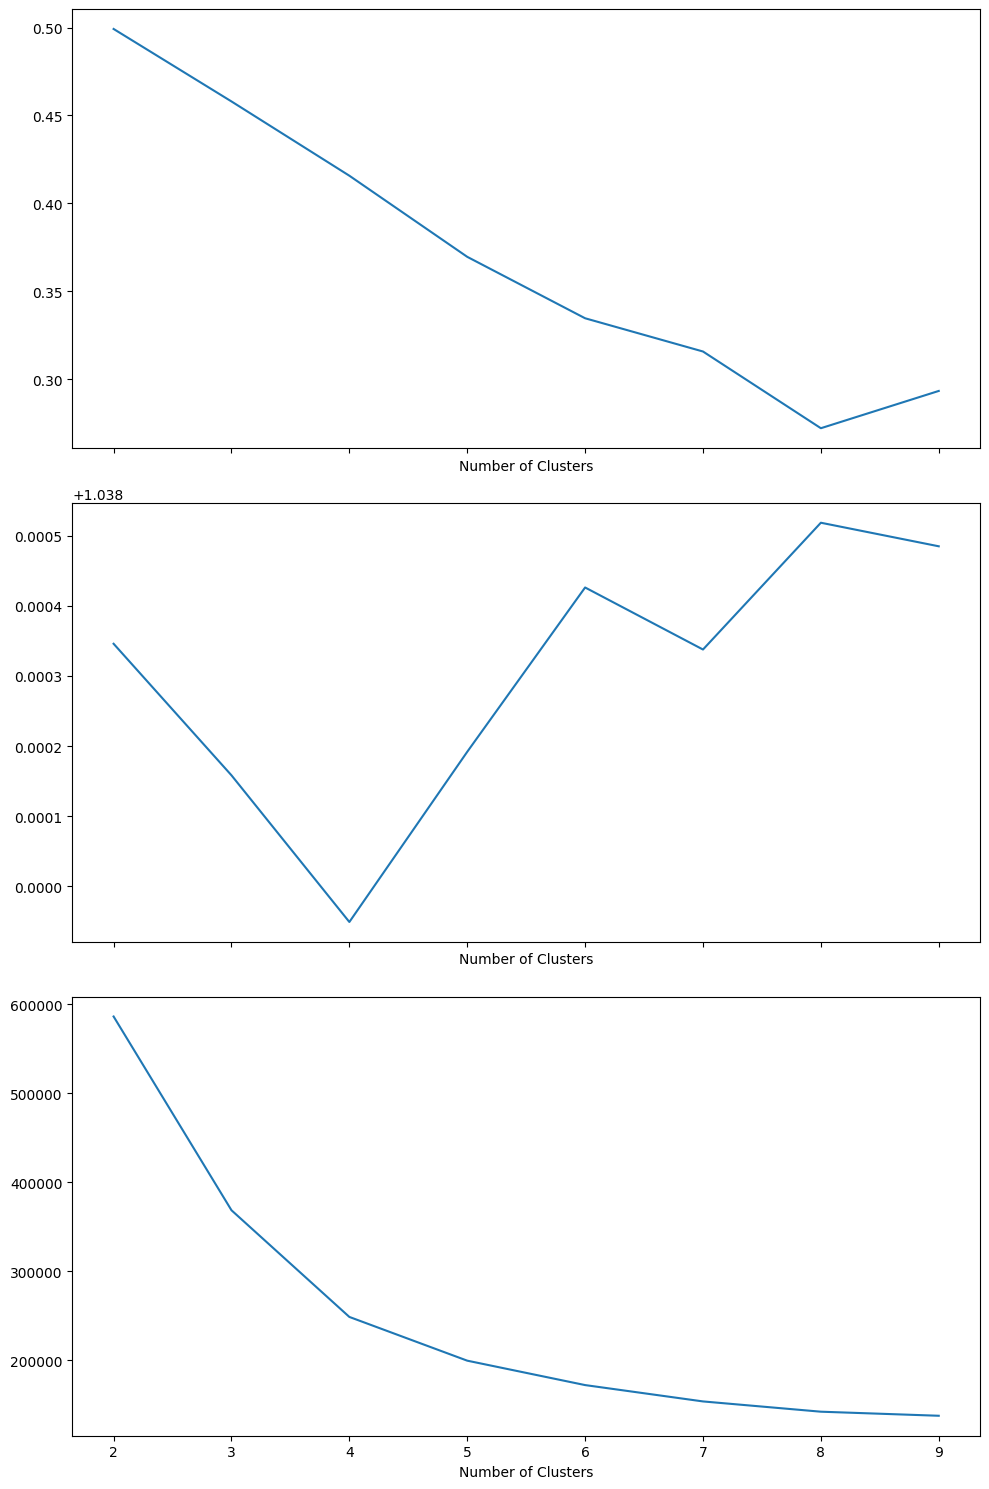

In [34]:
def plot_subplots(data_list, x_values, x_label, y_labels, titles):
    num_plots = len(data_list)

    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5*num_plots), sharex=True)

    for i in range(num_plots):
        ax = axes[i]
        ax.plot(x_values, data_list[i])
        ax.set_xticks(x_values)
        ax.set_xlabel(x_label)
        #ax.set_ylabel(y_labels[i])
        #ax.set_title(titles[i])

    plt.tight_layout()
    plt.show()

# Example usage
data_list = [silhouette_coefficients, rmse, SSE]  # List of data arrays
x_values = range(2, K)
x_label = "Number of Clusters"
y_labels = ["Silhouette Coefficient", "MSE"]  # List of y-axis labels
titles = ["Silhouette Coefficient vs. Number of Clusters", "MSE vs. Number of Clusters"]

plot_subplots(data_list, x_values, x_label, y_labels, titles)


# 3 Using Different Regression Algorithms to predict ratings

Now we have the final clusters we can use these to see how good of predictors they are for movie ratings. We can use different models and run these on the data and see how they perform.

Using Clusters = 7 first then we will try other clusters and see what is approprite.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [36]:
final_model = KMeans(n_clusters = 7)

In [37]:
final_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [38]:
clusters = pd.DataFrame(index = new_df.index, data = final_model.labels_, columns = ["cluster"])

In [39]:
final_df = df.merge(clusters, how = "inner", on = "userId")
final_dum = final_df.drop(['title'], axis = 1)

In [40]:
final_dum = pd.get_dummies(final_dum, drop_first = True)

# Save the DataFrame to a CSV file
final_dum.to_csv('final_dum.csv', index=False)

<Axes: xlabel='cluster', ylabel='count'>

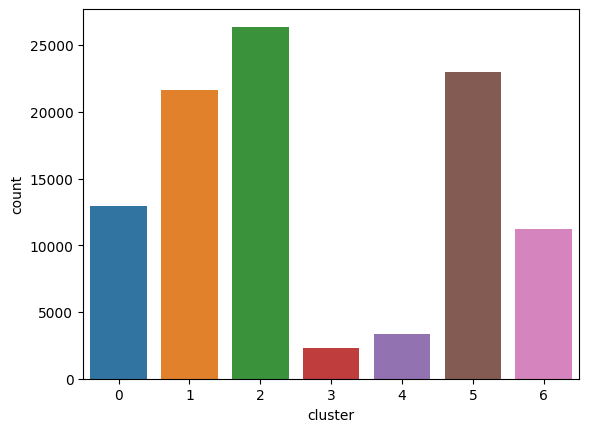

In [40]:
sns.countplot(data = final_df, x = "cluster")

<ipython-input-41-7576584ec31f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_corr = final_dum.corr()["cluster"]


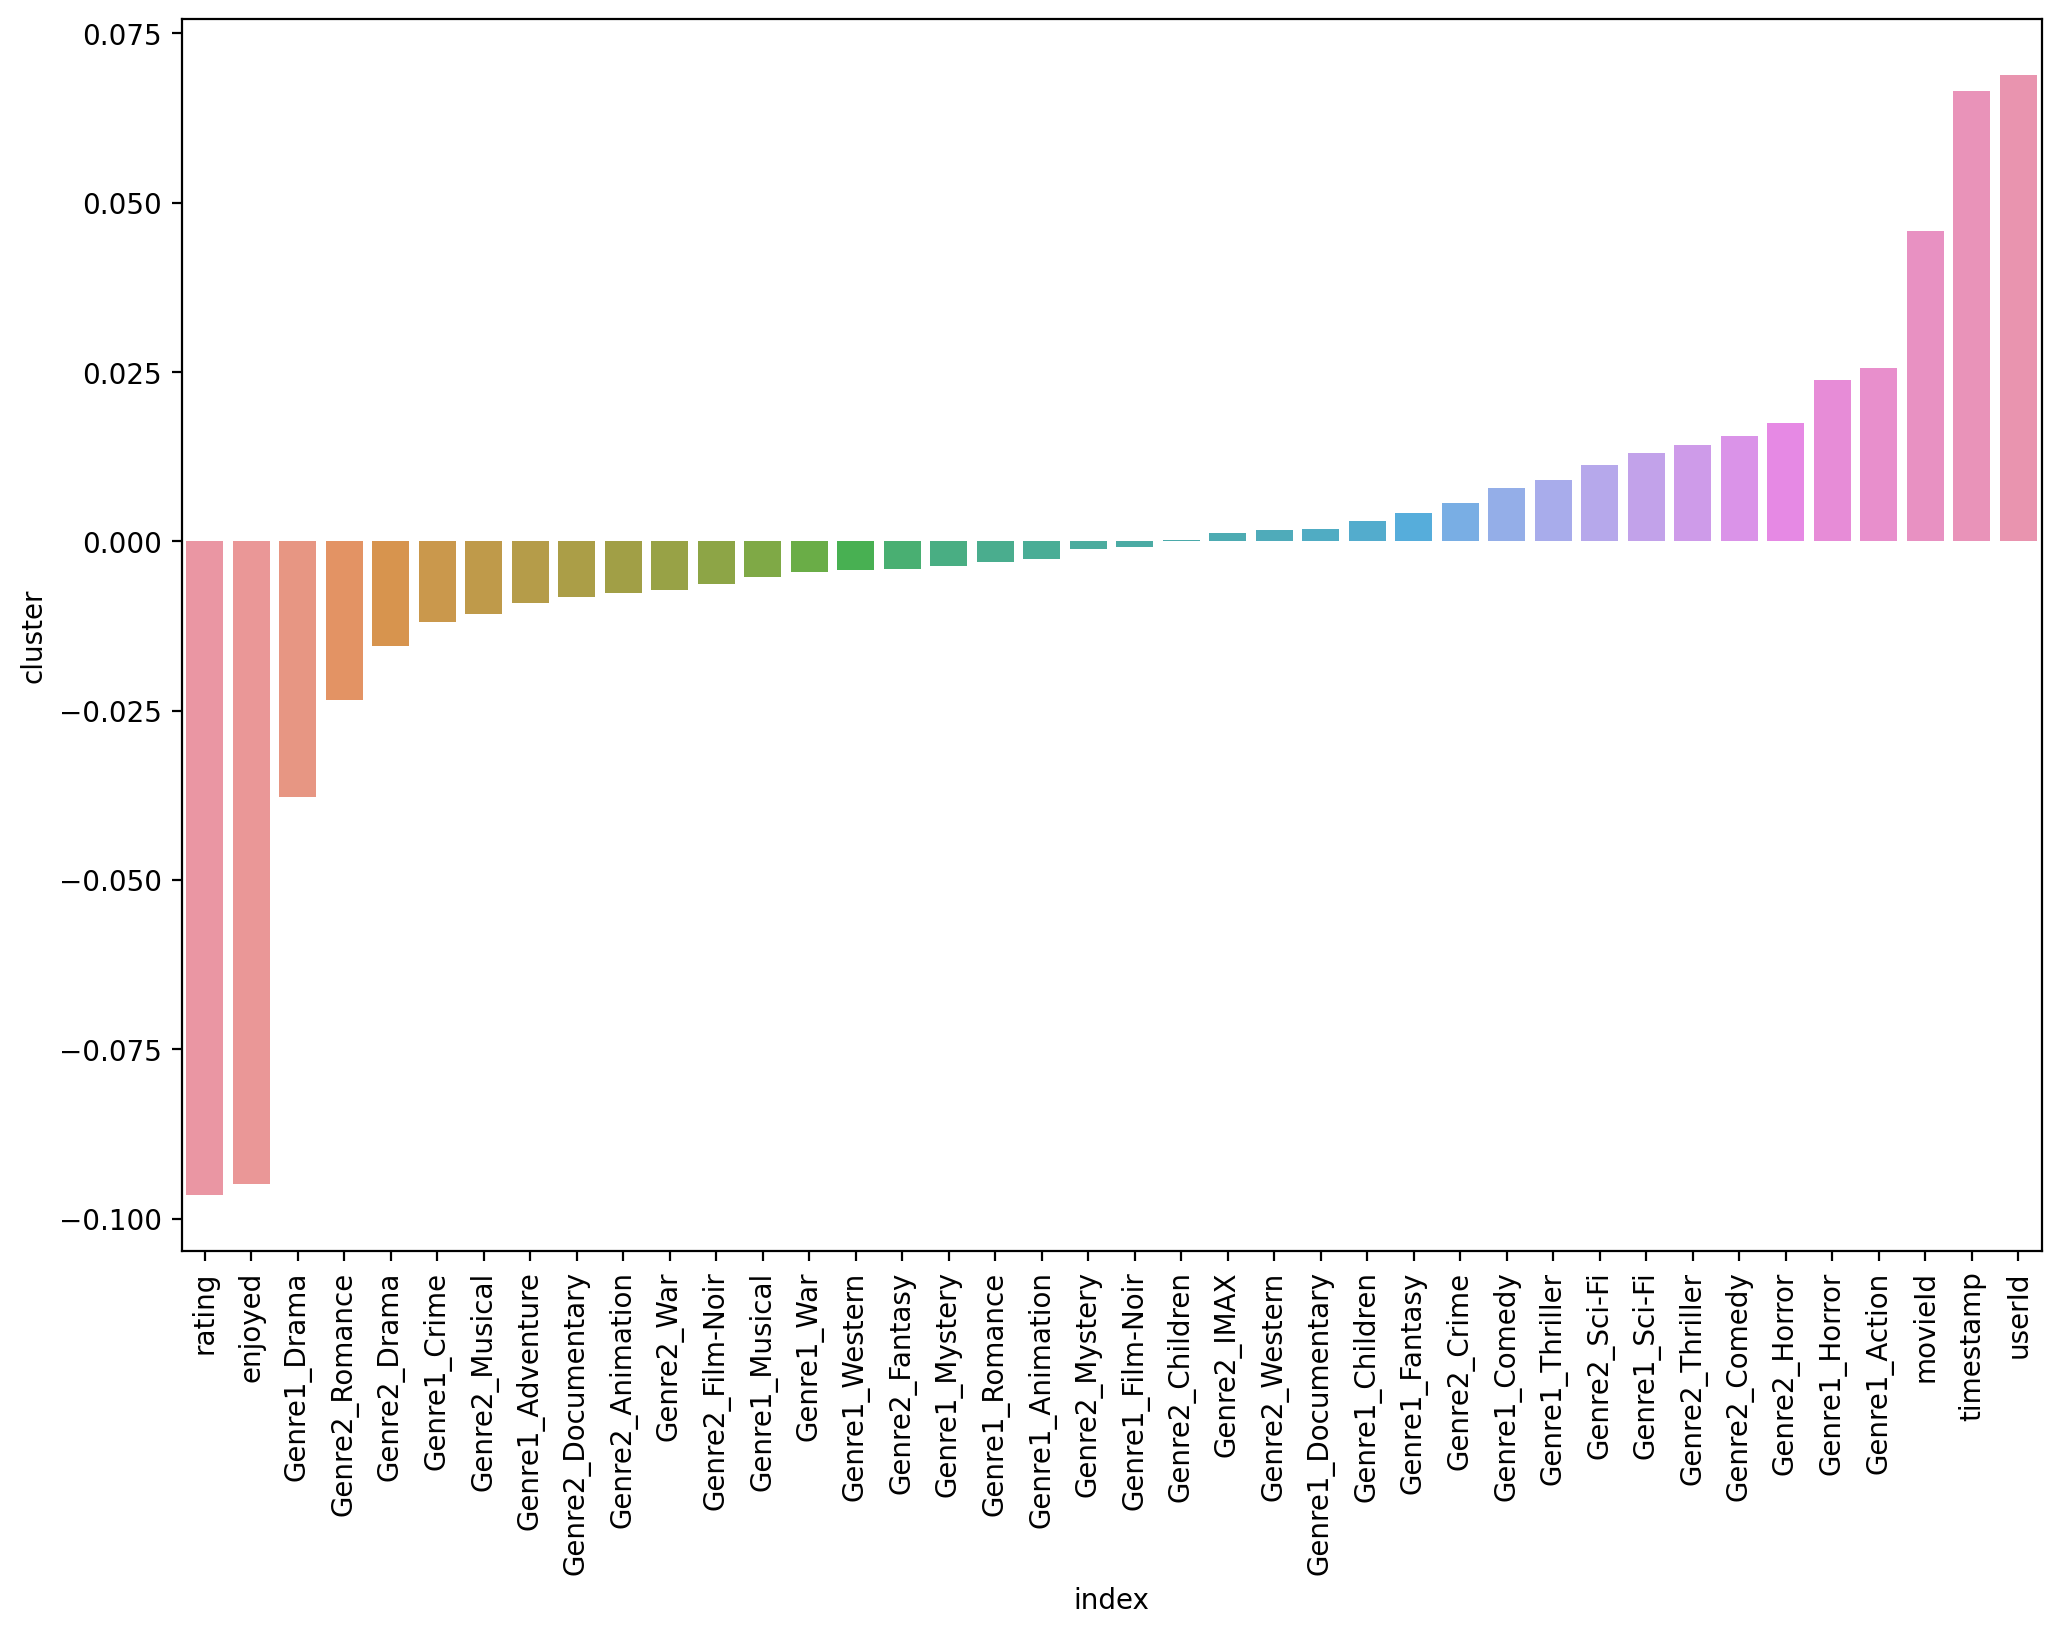

In [41]:

fig = plt.figure(figsize=(12, 8), dpi=200)

cluster_corr = final_dum.corr()["cluster"]
cluster_corr = cluster_corr.sort_values()[:-1]

cluster_corr = cluster_corr.reset_index()

sns.barplot(data=cluster_corr, x="index", y="cluster")
plt.xticks(rotation=90);

<ipython-input-42-59eb62327a48>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_dum.corr())


<Axes: >

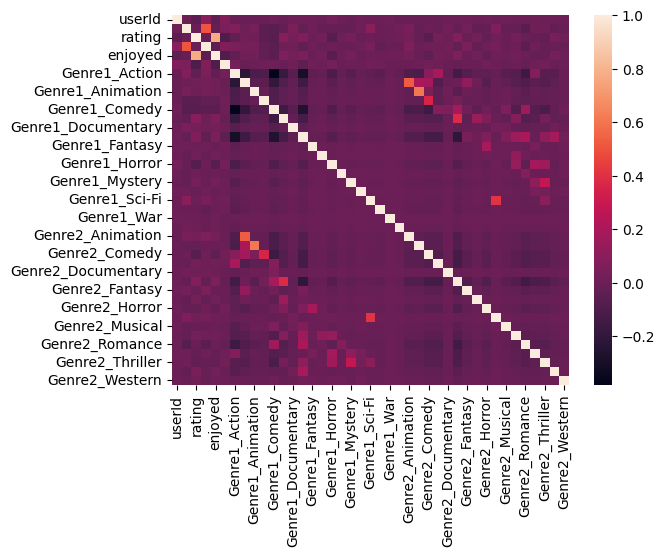

In [42]:
sns.heatmap(final_dum.corr())

In [43]:
final_dum

,userId,movieId,rating,timestamp,enjoyed,year,cluster,Genre1_Action,Genre1_Adventure,Genre1_Animation,...,Genre2_Film-Noir,Genre2_Horror,Genre2_IMAX,Genre2_Musical,Genre2_Mystery,Genre2_Romance,Genre2_Sci-Fi,Genre2_Thriller,Genre2_War,Genre2_Western
0,1,1,4.0,964982703,1,1995-01-01,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,1,1995-01-01,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,1,1995-01-01,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,47,5.0,964983815,1,1995-01-01,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,50,5.0,964982931,1,1995-01-01,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,578,68269,4.5,1300996671,1,2009-01-01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
100832,578,6751,2.5,1300990921,0,2003-01-01,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100833,578,7395,4.0,1300996571,1,1950-01-01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100834,578,56389,4.0,1300996756,1,2007-01-01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Try a base Linear Regression model as a basis.

We will try a linear regression model, a Support Vector machine and a tree based method using Random Forrst Classifer and compared the performance of these. We will further evaluate these later on by comparing to the Suprise model netflix uses

In [44]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

rmse_models = []

lr_model = LinearRegression()

X = final_dum.drop(["rating", "year"], axis = 1)
y = final_dum["rating"]

# define scaler
scaler = StandardScaler()

# Scale data
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rmse_models.append(run_model(lr_model, X_train, y_train, X_test, y_test))

In [45]:
# Random forest
rf_model = RandomForestRegressor(n_estimators = 100, random_state=42)

X = final_dum.drop(["rating", "year"], axis = 1)
y = final_dum["rating"]

# define scaler
scaler = StandardScaler()

# Scale data
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rmse_models.append(run_model(rf_model, X_train, y_train, X_test, y_test))


In [46]:
# SVM
SVM_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

X = final_dum.drop(["rating", "year"], axis = 1)
y = final_dum["rating"]

# define scaler
scaler = StandardScaler()

# Scale data
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rmse_models.append(run_model(SVM_model, X_train, y_train, X_test, y_test))

In [47]:
rmse_models

[0.659449326452807, 0.5964620523294836, 0.659691511018441]

# 4 Compare the the SVD State of the art Netflix model

Using Netflix SVD Recommendation model using Suprise Libary

In [48]:
pip install scikit-surprise

In [49]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

In [50]:
import pandas as pd
from surprise import Dataset

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Convert the dataset to a pandas DataFrame
data_df = pd.DataFrame(data.raw_ratings, columns=['user_id', 'item_id', 'rating', 'timestamp'])
data_df





,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


In [51]:
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
# It is to specify how to read the data frame.
reader = Reader(rating_scale=(1,5))
# create the traindata from the data frame
train_data_mf = data
# build the train set from traindata.
#It is of dataset format from surprise library
trainset = train_data_mf.build_full_trainset()
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=False)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9323  0.9349  0.9513  0.9377  0.9332  0.9379  0.0070  
MAE (testset)     0.7362  0.7340  0.7482  0.7409  0.7342  0.7387  0.0054  
Fit time          1.70    1.09    0.99    1.26    2.07    1.42    0.41    
Test time         0.33    0.11    0.10    0.36    0.20    0.22    0.11    


In [52]:
# Plot the losses against each other to see which are the best performers

This is a baseline model to compare to the performance of other models with clustering the RMSE is 0.9367 and MAE 0.73

The regression models i have used have managed to out perform this with the best one leading to a loss of 0.59 meaning it is able to predict the ratings within a 0.6 of a rating, this would have much applicability to recommendation systems, and shows the clustering was very effective at performing this.

# 5 Try using Neural Networks and Pytorch

In [53]:
# Covert dataframe into a tensor using torch.tensor

# Create base model for predictions using OOP

# Define input and output features

# Define optimiser and SGD function to use

# Run training/test loop - bring in helper functions

# 5.1 Try to perform Deep learning on uchanged data set Model 0

In [41]:
# import torch libaries
import torch
from torch import nn

In [42]:
import requests
from pathlib import Path

# Download helper functios from Learn pytorch if not avaiable
if Path("helper_functions.py").is_file():
  print("File already exists, skipping download")

else:
  print("Downloading helper_function.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

File already exists, skipping download


In [43]:
# Assuming data_df is your DataFrame containing ratings data
# Drop the "timestamp" column and any other non-numeric columns
numeric_data_df = final_dum.drop(["timestamp"], axis=1).select_dtypes(include=["float64", "float32", "float16", "complex64", "complex128", "int64", "int32", "int16", "int8", "uint8", "bool"])


# Create the tensor from the numeric data
ratings_tensor = torch.tensor(numeric_data_df.values).type(torch.float)

In [44]:
print(f"Data frame before: {final_dum.head()} \n; The Dataframe After dropping none Numeric fields: \n {numeric_data_df.head()}; ")

Data frame before:    userId  movieId  rating  timestamp  enjoyed       year  cluster  \
0       1        1     4.0  964982703        1 1995-01-01        3   
1       1        3     4.0  964981247        1 1995-01-01        3   
2       1        6     4.0  964982224        1 1995-01-01        3   
3       1       47     5.0  964983815        1 1995-01-01        3   
4       1       50     5.0  964982931        1 1995-01-01        3   

   Genre1_Action  Genre1_Adventure  Genre1_Animation  ...  Genre2_Film-Noir  \
0              0                 1                 0  ...                 0   
1              0                 0                 0  ...                 0   
2              1                 0                 0  ...                 0   
3              0                 0                 0  ...                 0   
4              0                 0                 0  ...                 0   

   Genre2_Horror  Genre2_IMAX  Genre2_Musical  Genre2_Mystery  Genre2_Romance  \
0   

In [45]:
ratings_tensor.shape

torch.Size([100836, 40])

# 5.2 Model_0 - The Linear Model

New model creating a NN linear class

In [46]:
class LinearNet(nn.Module):
    def __init__(self, input_size: int, hidden_units: int, output_size: int):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(input_size, hidden_units)
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x: torch.tensor):
        return self.linear(x)

# Define the input and output sizes
INPUT_SIZE = 39
OUTPUT_SIZE = 1
HIDDEN_UNITS = 10

# Create an instance of the LinearNet class
model_0 = LinearNet(input_size = INPUT_SIZE,
                    hidden_units=HIDDEN_UNITS,
                    output_size=OUTPUT_SIZE)






Define Optimiser and loss functions

In [47]:
from helper_functions import accuracy_fn

# Set up loss functions and optimiser
loss_fn = nn.L1Loss()
optimiser = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [48]:
y = ratings_tensor[:, 2]  # Select all rows and the column at index 2

# For y, we need to concatenate two slices: columns from index 0 to 1 and columns in reverse from index 3 to the last
X = torch.cat((ratings_tensor[:, 0:2], ratings_tensor[:, 3:]), dim=1)


In [49]:
X.shape

torch.Size([100836, 39])

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
# Set up the device
import torch

# Check if a GPU is available, and if not, use the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# reset to cpu
device = "cpu"


In [ ]:
# torch.manual_seed(42)

# # Set the number of epochs (how many times the model will pass over the training data)
# epochs = 3

# # Create empty loss lists to track values
# train_loss_values = []
# test_loss_values = []
# epoch_count = []


# # put model on device
# model_0.to(device)

# # put data on device
# X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# for epoch in range(epochs):
#     ### Training

#     # Put model in training mode (this is the default state of a model)
#     model_0.train()

#     # 1. Forward pass on train data using the forward() method inside
#     y_pred = model_0(X_train)
#     # print(y_pred)

#     # 2. Calculate the loss (how different are our models predictions to the ground truth)
#     loss = loss_fn(y_pred, y_train)

#     # 3. Zero grad of the optimizer
#     optimiser.zero_grad()

#     # 4. Loss backwards
#     loss.backward()

#     # 5. Progress the optimizer
#     optimiser.step()

#     ### Testing

#     # Put the model in evaluation mode
#     model_0.eval()

#     with torch.inference_mode():
#       # 1. Forward pass on test data
#       test_pred = model_0(X_test)

#       # 2. Caculate loss on test data
#       test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

#       # Print out what's happening
#       if epoch % 10 == 0:
#             epoch_count.append(epoch)
#             train_loss_values.append(loss.detach().numpy())
#             test_loss_values.append(test_loss.detach().numpy())
#             print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([80668])) that is different to the input size (torch.Size([80668, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [ ]:
y_train.shape, y_test.shape